In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
file = 'D:/projects/XAI-finance2/heloc_dataset_v2.csv'
df = pd.read_csv(file)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'D:/projects/XAI-finance2/heloc_dataset_v2.csv'

In [3]:
target_variable='RiskPerformance'
target_names=['Good', 'Bad']

#convert from string to numeric datatype
df.loc[df[target_variable]==target_names[1], 'Class']=0
df.loc[df[target_variable]==target_names[0], 'Class']=1
df['RiskPerformance']=df['Class'].astype(int)
df[target_variable]=df[target_variable].astype('category')


df.head()
df.describe()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,Class
count,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.00000,9861.000000,9861.000000,...,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000
mean,72.060440,201.047663,9.520535,78.744245,21.130413,0.580570,0.383734,92.35899,105.998783,5.758138,...,34.593348,0.192475,1.455532,1.396714,42.048981,3.919075,1.577021,0.560998,66.371768,0.479972
std,9.871795,97.250487,12.288235,33.904646,11.302849,1.238056,0.991851,11.76934,90.192626,1.641567,...,17.907026,5.855050,2.135229,2.095491,41.605560,3.342538,3.337305,2.601734,22.162833,0.499624
min,33.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,-8.000000,0.000000,0.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,0.000000
25%,64.000000,136.000000,3.000000,57.000000,13.000000,0.000000,0.000000,89.00000,14.000000,5.000000,...,21.000000,0.000000,0.000000,0.000000,-8.000000,2.000000,1.000000,0.000000,50.000000,0.000000
50%,72.000000,187.000000,6.000000,76.000000,20.000000,0.000000,0.000000,97.00000,66.000000,6.000000,...,33.000000,0.000000,1.000000,1.000000,52.000000,3.000000,2.000000,1.000000,67.000000,0.000000
75%,80.000000,257.000000,12.000000,97.000000,28.000000,1.000000,0.000000,100.00000,200.000000,7.000000,...,45.000000,1.000000,2.000000,2.000000,80.000000,5.000000,3.000000,1.000000,83.000000,1.000000
max,94.000000,803.000000,227.000000,322.000000,79.000000,19.000000,19.000000,100.00000,200.000000,9.000000,...,100.000000,24.000000,66.000000,66.000000,471.000000,32.000000,23.000000,18.000000,100.000000,1.000000


In [4]:
df=df[df['ExternalRiskEstimate']!= -9]
df

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,Class
0,0,55,144,4,84,20,3,0,83,2,...,0,0,0,33,-8,8,1,1,69,0.0
1,0,61,58,15,41,2,4,4,100,200,...,0,0,0,0,-8,0,-8,-8,0,0.0
2,0,67,66,5,24,9,0,0,100,200,...,0,4,4,53,66,4,2,1,86,0.0
3,0,66,169,1,73,28,1,1,93,76,...,0,5,4,72,83,6,4,3,91,0.0
4,0,81,333,27,132,12,0,0,100,200,...,0,1,1,51,89,3,1,0,80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9856,1,73,131,5,57,21,0,0,95,80,...,7,0,0,26,-8,5,2,0,100,1.0
9857,0,65,147,39,68,11,0,0,92,28,...,1,1,1,86,53,2,2,1,80,0.0
9858,0,74,129,6,64,18,1,1,100,200,...,3,4,4,6,-8,5,-8,0,56,0.0
9859,0,72,234,12,113,42,2,2,96,35,...,6,0,0,19,-8,4,1,0,38,0.0


## Pair plots

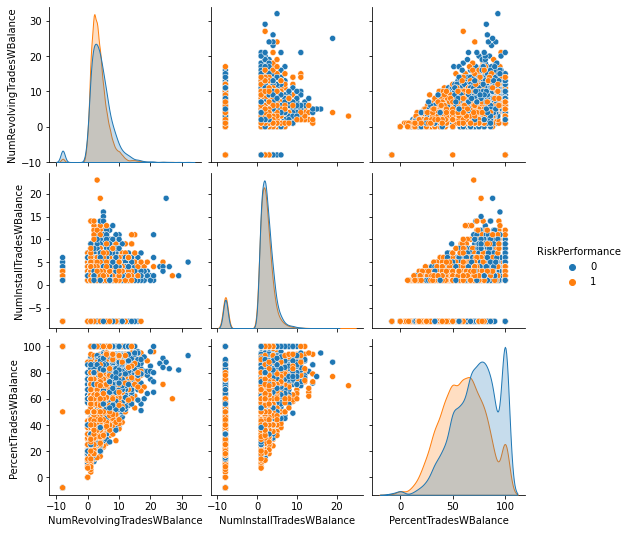

In [5]:
sns.pairplot(df, vars=['NumRevolvingTradesWBalance', 'NumInstallTradesWBalance','PercentTradesWBalance'], hue='RiskPerformance')
plt.show()

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

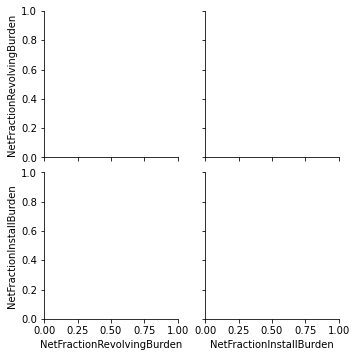

In [6]:
sns.pairplot(df, vars=['NetFractionRevolvingBurden', 'NetFractionInstallBurden'], hue='RiskPerformance')
plt.show()

In [ ]:
sns.pairplot(df, vars=['MSinceOldestTradeOpen','MSinceMostRecentTradeOpen','AverageMInFile','NumSatisfactoryTrades'], hue='RiskPerformance')
plt.show()

## Applying KNN 

In [7]:
#Replacing -7 values in MSinceMostRecentDelq
df.MSinceMostRecentDelq[df[df.MSinceMostRecentDelq==-7].index]=150
#df['MSinceMostRecentDelq'] = df['MSinceMostRecentDelq'].replace('-7', '150')
df.head(10)

<ipython-input-7-fdedcb490a08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.MSinceMostRecentDelq[df[df.MSinceMostRecentDelq==-7].index]=150


,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,Class
0,0,55,144,4,84,20,3,0,83,2,...,0,0,0,33,-8,8,1,1,69,0.0
1,0,61,58,15,41,2,4,4,100,200,...,0,0,0,0,-8,0,-8,-8,0,0.0
2,0,67,66,5,24,9,0,0,100,200,...,0,4,4,53,66,4,2,1,86,0.0
3,0,66,169,1,73,28,1,1,93,76,...,0,5,4,72,83,6,4,3,91,0.0
4,0,81,333,27,132,12,0,0,100,200,...,0,1,1,51,89,3,1,0,80,0.0
5,0,59,137,11,78,31,0,0,91,1,...,0,0,0,62,93,12,4,3,94,0.0
6,1,54,88,7,37,25,0,0,92,9,...,0,4,4,89,76,7,7,2,100,1.0
7,1,68,148,7,65,17,0,0,83,31,...,0,0,0,28,48,2,2,2,40,1.0
8,0,59,324,2,138,24,0,0,85,5,...,0,1,1,68,-8,7,1,3,90,0.0
9,0,61,79,4,36,19,0,0,95,5,...,0,6,6,31,86,5,3,1,62,0.0


In [8]:
#applying KNN to MSinceOldestTradeOpen

test_df = df[df['MSinceOldestTradeOpen']== -8]

train_df = df[df['MSinceOldestTradeOpen']!= -8]
test_df

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,Class


In [ ]:
#Split into test and train
from sklearn.model_selection import train_test_split
train , test = train_test_split(train_df, test_size = 0.3)

x_train = train.drop(['ExternalRiskEstimate','MSinceOldestTradeOpen','NumTrades60Ever2DerogPubRec','NumTrades90Ever2DerogPubRec','PercentTradesNeverDelq','MSinceMostRecentDelq','MSinceMostRecentInqexcl7days','NumInqLast6M','NumInqLast6Mexcl7days','NetFractionRevolvingBurden','NetFractionInstallBurden','NumRevolvingTradesWBalance','NumInstallTradesWBalance','NumBank2NatlTradesWHighUtilization','PercentTradesWBalance','Class'], axis=1)
y_train = train['MSinceOldestTradeOpen']

x_test = test.drop(['ExternalRiskEstimate','MSinceOldestTradeOpen','NumTrades60Ever2DerogPubRec','NumTrades90Ever2DerogPubRec','PercentTradesNeverDelq','MSinceMostRecentDelq','MSinceMostRecentInqexcl7days','NumInqLast6M','NumInqLast6Mexcl7days','NetFractionRevolvingBurden','NetFractionInstallBurden','NumRevolvingTradesWBalance','NumInstallTradesWBalance','NumBank2NatlTradesWHighUtilization','PercentTradesWBalance','Class'], axis=1)
y_test = test['MSinceOldestTradeOpen']


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
print("\n---------------------------\n")
x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(50):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

In [ ]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#preprocessing test dataset
# test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
# test['Item_Weight'].fillna(mean, inplace =True)
# test = pd.get_dummies(test)
# test_scaled = scaler.fit_transform(test)
# test = pd.DataFrame(test_scaled)

x_test = test_df.drop(['ExternalRiskEstimate','MSinceOldestTradeOpen','NumTrades60Ever2DerogPubRec','NumTrades90Ever2DerogPubRec','PercentTradesNeverDelq','MSinceMostRecentDelq','MSinceMostRecentInqexcl7days','NumInqLast6M','NumInqLast6Mexcl7days','NetFractionRevolvingBurden','NetFractionInstallBurden','NumRevolvingTradesWBalance','NumInstallTradesWBalance','NumBank2NatlTradesWHighUtilization','PercentTradesWBalance','Class'], axis=1)
y_test = test_df['MSinceOldestTradeOpen']

classifier = neighbors.KNeighborsRegressor(n_neighbors = 39)

classifier.fit(x_train, y_train)

#test= test_df['MSinceOldestTradeOpen']
test_scaled = scaler.fit_transform(x_test)
test = pd.DataFrame(test_scaled)

#predicting on the test set and creating submission file
predict = classifier.predict(test)

print("\n---------------------------\n")
print("Predicted Values for Test Set :\n",predict)



## KNN for last 6 columns

### MSinceMostRecentDelq

In [9]:
#Replacing -7 values in MSinceMostRecentDelq
df.MSinceMostRecentDelq[df[df.MSinceMostRecentDelq==-7].index]=200
#df['MSinceMostRecentDelq'] = df['MSinceMostRecentDelq'].replace('-7', '150')
df.head(10)

<ipython-input-9-9811fc650eef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.MSinceMostRecentDelq[df[df.MSinceMostRecentDelq==-7].index]=200


,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,Class
0,0,55,144,4,84,20,3,0,83,2,...,0,0,0,33,-8,8,1,1,69,0.0
1,0,61,58,15,41,2,4,4,100,200,...,0,0,0,0,-8,0,-8,-8,0,0.0
2,0,67,66,5,24,9,0,0,100,200,...,0,4,4,53,66,4,2,1,86,0.0
3,0,66,169,1,73,28,1,1,93,76,...,0,5,4,72,83,6,4,3,91,0.0
4,0,81,333,27,132,12,0,0,100,200,...,0,1,1,51,89,3,1,0,80,0.0
5,0,59,137,11,78,31,0,0,91,1,...,0,0,0,62,93,12,4,3,94,0.0
6,1,54,88,7,37,25,0,0,92,9,...,0,4,4,89,76,7,7,2,100,1.0
7,1,68,148,7,65,17,0,0,83,31,...,0,0,0,28,48,2,2,2,40,1.0
8,0,59,324,2,138,24,0,0,85,5,...,0,1,1,68,-8,7,1,3,90,0.0
9,0,61,79,4,36,19,0,0,95,5,...,0,6,6,31,86,5,3,1,62,0.0


,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,SortingAssist
count,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.00000,9861.000000,...,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000
mean,0.479972,72.060440,201.047663,9.520535,78.744245,21.130413,0.580570,0.383734,92.35899,105.998783,...,34.593348,0.192475,1.455532,1.396714,42.048981,3.919075,1.577021,0.560998,66.371768,4931.000000
std,0.499624,9.871795,97.250487,12.288235,33.904646,11.302849,1.238056,0.991851,11.76934,90.192626,...,17.907026,5.855050,2.135229,2.095491,41.605560,3.342538,3.337305,2.601734,22.162833,2846.769836
min,0.000000,33.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,-8.000000,0.000000,0.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,1.000000
25%,0.000000,64.000000,136.000000,3.000000,57.000000,13.000000,0.000000,0.000000,89.00000,14.000000,...,21.000000,0.000000,0.000000,0.000000,-8.000000,2.000000,1.000000,0.000000,50.000000,2466.000000
50%,0.000000,72.000000,187.000000,6.000000,76.000000,20.000000,0.000000,0.000000,97.00000,66.000000,...,33.000000,0.000000,1.000000,1.000000,52.000000,3.000000,2.000000,1.000000,67.000000,4931.000000
75%,1.000000,80.000000,257.000000,12.000000,97.000000,28.000000,1.000000,0.000000,100.00000,200.000000,...,45.000000,1.000000,2.000000,2.000000,80.000000,5.000000,3.000000,1.000000,83.000000,7396.000000
max,1.000000,94.000000,803.000000,227.000000,322.000000,79.000000,19.000000,19.000000,100.00000,200.000000,...,100.000000,24.000000,66.000000,66.000000,471.000000,32.000000,23.000000,18.000000,100.000000,9861.000000


In [10]:
#applying KNN to MSinceOldestTradeOpen
df2=df[df['MSinceMostRecentDelq']!= 200]
test_df = df2[df2['MSinceMostRecentDelq']== -8]

train_df = df2[df2['MSinceMostRecentDelq']!= -8]
test_df

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,Class


In [ ]:
#Split into test and train
from sklearn.model_selection import train_test_split
train , test = train_test_split(train_df, test_size = 0.3)

x_train = train.drop(['MSinceMostRecentDelq','RiskPerformance','ExternalRiskEstimate','MSinceOldestTradeOpen','MSinceMostRecentTradeOpen','AverageMInFile','NumTotalTrades','NumTradesOpeninLast12M','PercentInstallTrades','MSinceMostRecentInqexcl7days','NumInqLast6M','NumInqLast6Mexcl7days','NetFractionRevolvingBurden','NetFractionInstallBurden','NumRevolvingTradesWBalance','NumInstallTradesWBalance','NumBank2NatlTradesWHighUtilization','PercentTradesWBalance','Class'], axis=1)
y_train = train['MSinceMostRecentDelq']

x_test = test.drop(['MSinceMostRecentDelq','RiskPerformance','ExternalRiskEstimate','MSinceOldestTradeOpen','MSinceMostRecentTradeOpen','AverageMInFile','NumTotalTrades','NumTradesOpeninLast12M','PercentInstallTrades','MSinceMostRecentInqexcl7days','NumInqLast6M','NumInqLast6Mexcl7days','NetFractionRevolvingBurden','NetFractionInstallBurden','NumRevolvingTradesWBalance','NumInstallTradesWBalance','NumBank2NatlTradesWHighUtilization','PercentTradesWBalance','Class'], axis=1)
y_test = test['MSinceMostRecentDelq']


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
rmse_val2 = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val2.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

In [ ]:
curve = pd.DataFrame(rmse_val2) #elbow curve 
curve.plot()

In [ ]:

x_test = test_df.drop(['MSinceMostRecentDelq','RiskPerformance','ExternalRiskEstimate','MSinceOldestTradeOpen','MSinceMostRecentTradeOpen','AverageMInFile','NumTotalTrades','NumTradesOpeninLast12M','PercentInstallTrades','MSinceMostRecentInqexcl7days','NumInqLast6M','NumInqLast6Mexcl7days','NetFractionRevolvingBurden','NetFractionInstallBurden','NumRevolvingTradesWBalance','NumInstallTradesWBalance','NumBank2NatlTradesWHighUtilization','PercentTradesWBalance','Class'], axis=1)
y_test = test_df['MSinceMostRecentDelq']

classifier = neighbors.KNeighborsClassifier(n_neighbors = 3)

classifier.fit(x_train, y_train)

#test= test_df['MSinceOldestTradeOpen']
test_scaled = scaler.fit_transform(x_test)
test = pd.DataFrame(test_scaled)

#predicting on the test set and creating submission file
predict = classifier.predict(test)

print("\n---------------------------\n")
print("Predicted Values for Test Set :\n",predict)

In [ ]:
result=pd.DataFrame(predict)

result.to_csv('D:/projects/XAI-finance2/result_MSinceMostRecentDelq.csv')

### NetFractionRevolvingBurden

In [139]:
file = 'D:/projects/XAI-finance2/HELOC1-1.csv'
df = pd.read_csv(file)
df

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,SortingAssist
0,0,55,144,4,84,20,3,0,83,2,...,0,0,0,33,-8,8,1,1,69,1
1,0,61,58,15,41,2,4,4,100,200,...,0,0,0,0,-8,0,2,0,0,2
2,0,67,66,5,24,9,0,0,100,200,...,0,4,4,53,66,4,2,1,86,3
3,0,66,169,1,73,28,1,1,93,76,...,0,5,4,72,83,6,4,3,91,4
4,0,81,333,27,132,12,0,0,100,200,...,0,1,1,51,89,3,1,0,80,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9856,1,73,131,5,57,21,0,0,95,80,...,7,0,0,26,-8,5,2,0,100,9857
9857,0,65,147,39,68,11,0,0,92,28,...,1,1,1,86,53,2,2,1,80,9858
9858,0,74,129,6,64,18,1,1,100,200,...,3,4,4,6,-8,5,3,0,56,9859
9859,0,72,234,12,113,42,2,2,96,35,...,6,0,0,19,-8,4,1,0,38,9860


In [140]:
#applying KNN to MSinceOldestTradeOpen

test_df = df[df['NetFractionRevolvingBurden']==-8]

train_df = df[df['NetFractionRevolvingBurden']!=-8]
test_df

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,SortingAssist


In [39]:
#Split into test and train
from sklearn.model_selection import train_test_split
train , test = train_test_split(train_df, test_size = 0.3)

to_be_dropped =['NetFractionRevolvingBurden', 'MSinceMostRecentInqexcl7days', 'NetFractionInstallBurden','NumRevolvingTradesWBalance','NumInstallTradesWBalance','NumBank2NatlTradesWHighUtilization','PercentTradesWBalance', 'SortingAssist']

x_train = train.drop(to_be_dropped, axis=1)
y_train = train['NetFractionRevolvingBurden']

x_test = test.drop(to_be_dropped, axis=1)
y_test = test['NetFractionRevolvingBurden']


In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [41]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
rmse_val2 = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val2.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 18.638371411925693
RMSE value for k=  2 is: 14.462643449783153
RMSE value for k=  3 is: 15.436308808443478
RMSE value for k=  4 is: 15.430714320615376
RMSE value for k=  5 is: 15.150819559790598
RMSE value for k=  6 is: 14.745165560528896
RMSE value for k=  7 is: 14.384487897158245
RMSE value for k=  8 is: 14.24418741101085
RMSE value for k=  9 is: 14.05403544212497
RMSE value for k=  10 is: 13.981865238785403
RMSE value for k=  11 is: 14.049945344638454
RMSE value for k=  12 is: 14.360255454844634
RMSE value for k=  13 is: 14.586282316655273
RMSE value for k=  14 is: 14.755434449889595
RMSE value for k=  15 is: 14.954792782265283
RMSE value for k=  16 is: 15.13195647531519
RMSE value for k=  17 is: 15.311212166026555
RMSE value for k=  18 is: 15.333834309225168
RMSE value for k=  19 is: 15.477268650357733
RMSE value for k=  20 is: 15.584985206566252


<AxesSubplot:>

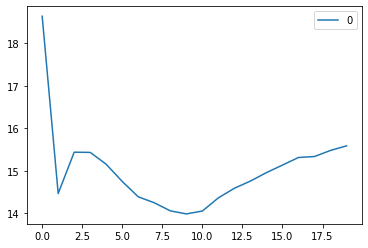

In [46]:
curve = pd.DataFrame(rmse_val2) #elbow curve 
curve.plot()

In [49]:

x_test = test_df.drop(to_be_dropped, axis=1)
y_test = test_df['NetFractionRevolvingBurden']

classifier = neighbors.KNeighborsRegressor(n_neighbors = 11)

classifier.fit(x_train, y_train)

#test= test_df['MSinceOldestTradeOpen']
test_scaled = scaler.fit_transform(x_test)
test = pd.DataFrame(test_scaled)

#predicting on the test set and creating submission file
predict = classifier.predict(test)

print("\n---------------------------\n")
print("Predicted Values for Test Set :\n",predict)


---------------------------

Predicted Values for Test Set :
 [36.72727273 39.27272727 59.         28.54545455 39.36363636 23.72727273
 27.54545455 30.90909091 33.90909091 42.45454545 63.72727273 34.
 35.54545455 19.45454545 45.         35.18181818 24.63636364 16.72727273
 37.72727273 45.36363636 65.63636364 31.63636364 29.63636364 49.90909091
 57.81818182 78.09090909 43.45454545 44.54545455 57.         50.81818182
 85.45454545 26.         43.45454545 31.         46.54545455 72.72727273
 65.36363636 48.72727273 39.36363636 50.72727273 74.         12.90909091
 52.09090909 50.63636364 43.27272727 62.72727273 35.         48.54545455
 60.36363636 47.         37.09090909 50.54545455 41.54545455 67.18181818
 41.         32.90909091 36.72727273 68.45454545 19.90909091 39.72727273
 12.90909091 40.72727273 38.81818182 34.72727273 71.54545455 26.81818182
 52.63636364 48.         72.81818182 48.63636364 65.63636364 35.45454545
 57.45454545 37.18181818 35.18181818 22.72727273 40.72727273 13.18181

In [52]:
rounded_values=np.round_(predict)
rounded_values

array([37., 39., 59., 29., 39., 24., 28., 31., 34., 42., 64., 34., 36.,
       19., 45., 35., 25., 17., 38., 45., 66., 32., 30., 50., 58., 78.,
       43., 45., 57., 51., 85., 26., 43., 31., 47., 73., 65., 49., 39.,
       51., 74., 13., 52., 51., 43., 63., 35., 49., 60., 47., 37., 51.,
       42., 67., 41., 33., 37., 68., 20., 40., 13., 41., 39., 35., 72.,
       27., 53., 48., 73., 49., 66., 35., 57., 37., 35., 23., 41., 13.,
        6., 36., 68., 11., 59., 60., 42., 55., 42., 35., 42., 75., 23.,
        7., 27., 70., 39., 46., 63., 69., 67., 27., 32., 19., 23., 73.,
       49., 54., 28., 55., 43., 15., 63., 19., 35., 44., 27., 58., 13.,
       39., 35., 56., 44., 66., 22., 58., 51., 62., 73., 61., 66., 43.,
       40., 46., 49., 37., 56., 44., 33., 38., 41., 36., 56., 73., 50.,
       40., 31., 43., 66., 59., 50., 32., 49., 49., 67., 57., 43., 68.,
       62., 70., 36., 47., 45., 56., 40., 64., 47., 68., 55., 58., 26.,
       19., 53., 35., 40., 44., 41.,  8., 19., 25., 15., 41.])

In [53]:
result=pd.DataFrame(rounded_values)

result.to_csv('D:/projects/XAI-finance2/result_NetFractionRevolvingBurden.csv')

### NumBank2NatlTradesWHighUtilization

In [16]:
#applying KNN to MSinceOldestTradeOpen

test_df = df[df['NumBank2NatlTradesWHighUtilization']==-8]

train_df = df[df['NumBank2NatlTradesWHighUtilization']!=-8]
test_df

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,SortingAssist
1,0,61,58,15,41,2,4,4,100,200,...,0,0,0,0,-8,0,-8,-8,0,2
14,0,63,262,26,95,3,2,2,75,27,...,0,0,0,37,-8,-8,1,-8,100,15
40,1,86,318,18,90,13,0,0,100,200,...,0,0,0,0,44,0,2,-8,50,41
50,0,78,197,23,91,15,0,0,100,200,...,0,5,5,57,32,2,2,-8,67,51
62,1,81,126,9,78,18,0,0,100,200,...,0,0,0,0,64,1,3,-8,80,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9681,1,72,111,111,111,1,1,0,0,19,...,-8,0,0,41,-8,-8,-8,-8,100,9682
9703,1,76,147,1,68,30,0,0,94,26,...,0,4,4,0,10,0,2,-8,50,9704
9711,0,60,99,3,48,33,0,0,97,7,...,0,1,0,100,95,1,5,-8,100,9712
9819,1,67,279,5,60,35,0,0,100,200,...,2,2,2,93,90,1,4,-8,100,9820


In [18]:
#Split into test and train
from sklearn.model_selection import train_test_split
train , test = train_test_split(train_df, test_size = 0.3)

to_be_dropped =['NumBank2NatlTradesWHighUtilization','NetFractionInstallBurden', 'NumRevolvingTradesWBalance','NumInstallTradesWBalance','PercentTradesWBalance', 'SortingAssist']

x_train = train.drop(to_be_dropped, axis=1)
y_train = train['NumBank2NatlTradesWHighUtilization']

x_test = test.drop(to_be_dropped, axis=1)
y_test = test['NumBank2NatlTradesWHighUtilization']


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [20]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
rmse_val2 = [] #to store rmse values for different k
for K in range(50):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val2.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.3727425507183653
RMSE value for k=  2 is: 1.2862824779438327
RMSE value for k=  3 is: 1.2673144777374596
RMSE value for k=  4 is: 1.2508342514016557
RMSE value for k=  5 is: 1.240359811631914
RMSE value for k=  6 is: 1.2339542036837128
RMSE value for k=  7 is: 1.2304018389979574
RMSE value for k=  8 is: 1.232081732204199
RMSE value for k=  9 is: 1.2286588978057034
RMSE value for k=  10 is: 1.2276472341494182
RMSE value for k=  11 is: 1.2258790891247096
RMSE value for k=  12 is: 1.2245881496391915
RMSE value for k=  13 is: 1.2294086576523642
RMSE value for k=  14 is: 1.2270580994686857
RMSE value for k=  15 is: 1.2296923419954893
RMSE value for k=  16 is: 1.231001873085432
RMSE value for k=  17 is: 1.2316596812684486
RMSE value for k=  18 is: 1.2293421656971208
RMSE value for k=  19 is: 1.2299748906061767
RMSE value for k=  20 is: 1.2279980381183018
RMSE value for k=  21 is: 1.2282954568852897
RMSE value for k=  22 is: 1.2291840618248027
RMSE value for k=  23 

<AxesSubplot:>

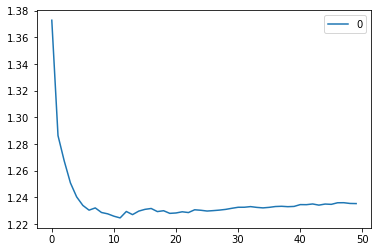

In [22]:
curve = pd.DataFrame(rmse_val2) #elbow curve 
curve.plot()

In [23]:

x_test = test_df.drop(to_be_dropped, axis=1)
y_test = test_df['NetFractionInstallBurden']

classifier = neighbors.KNeighborsRegressor(n_neighbors = 11)

classifier.fit(x_train, y_train)

#test= test_df['MSinceOldestTradeOpen']
test_scaled = scaler.fit_transform(x_test)
test = pd.DataFrame(test_scaled)

#predicting on the test set and creating submission file
predict = classifier.predict(test)

print("\n---------------------------\n")
print("Predicted Values for Test Set :\n",predict)


---------------------------

Predicted Values for Test Set :
 [0.45454545 0.27272727 0.         1.54545455 0.09090909 0.09090909
 0.18181818 0.18181818 0.45454545 0.36363636 0.27272727 0.72727273
 1.72727273 0.63636364 0.27272727 0.63636364 0.09090909 1.81818182
 0.36363636 0.09090909 0.27272727 0.         0.09090909 0.36363636
 0.27272727 2.         0.36363636 0.         0.54545455 1.36363636
 0.90909091 0.36363636 0.63636364 2.         0.54545455 0.36363636
 0.27272727 0.72727273 0.27272727 0.54545455 0.72727273 0.45454545
 0.18181818 0.27272727 1.         0.27272727 0.         0.54545455
 0.90909091 0.36363636 0.45454545 0.63636364 0.27272727 1.63636364
 2.54545455 0.27272727 0.54545455 0.54545455 0.90909091 0.36363636
 0.27272727 0.09090909 1.45454545 0.09090909 2.         0.45454545
 0.54545455 0.72727273 1.90909091 0.         0.         0.45454545
 0.27272727 0.45454545 0.27272727 0.09090909 0.45454545 0.45454545
 0.18181818 0.45454545 0.54545455 1.45454545 0.18181818 0.09090909

In [24]:
rounded_values=np.round_(predict)
rounded_values

array([0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 1., 2., 1., 0., 1., 0.,
       2., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 1., 1., 1., 0., 1., 2.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 0., 2., 3., 0., 1., 1., 1., 0., 0., 0., 1., 0., 2., 0., 1., 1.,
       2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 2., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 2., 1., 1., 0., 0., 0., 0., 2., 2., 1., 0., 1.,
       0., 1., 3., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 2.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 2., 0., 0., 0., 1., 0., 0., 1., 0., 0., 2., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 3., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
result=pd.DataFrame(rounded_values)

result.to_csv('D:/projects/XAI-finance2/result_NumBank2NatlTradesWHighUtilization.csv')

### NumRevolvingTradesWBalance

In [44]:
file = 'D:/projects/XAI-finance2/HELOC1-1.csv'
df = pd.read_csv(file)
df

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,SortingAssist
0,0,55,144,4,84,20,3,0,83,2,...,0,0,0,33,-8,8,1,1,69,1
1,0,61,58,15,41,2,4,4,100,200,...,0,0,0,0,-8,0,-8,0,0,2
2,0,67,66,5,24,9,0,0,100,200,...,0,4,4,53,66,4,2,1,86,3
3,0,66,169,1,73,28,1,1,93,76,...,0,5,4,72,83,6,4,3,91,4
4,0,81,333,27,132,12,0,0,100,200,...,0,1,1,51,89,3,1,0,80,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9856,1,73,131,5,57,21,0,0,95,80,...,7,0,0,26,-8,5,2,0,100,9857
9857,0,65,147,39,68,11,0,0,92,28,...,1,1,1,86,53,2,2,1,80,9858
9858,0,74,129,6,64,18,1,1,100,200,...,3,4,4,6,-8,5,-8,0,56,9859
9859,0,72,234,12,113,42,2,2,96,35,...,6,0,0,19,-8,4,1,0,38,9860


In [53]:
#applying KNN to MSinceOldestTradeOpen

test_df = df[df['NumRevolvingTradesWBalance']==-8]

train_df = df[df['NumRevolvingTradesWBalance']!=-8]
test_df

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,SortingAssist
14,0,63,262,26,95,3,2,2,75,27,...,0,0,0,37,-8,-8,1,0,100,15
105,0,64,246,16,106,5,3,3,88,57,...,-7,1,1,39,144,-8,4,0,100,106
145,0,62,27,19,22,3,2,2,100,200,...,2,4,4,59,-8,-8,1,1,100,146
262,0,65,77,6,50,2,1,1,67,57,...,0,0,0,39,-8,-8,1,0,100,263
336,1,73,337,4,110,6,2,0,67,26,...,0,1,1,28,82,-8,3,1,100,337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9582,1,88,218,54,162,9,0,0,100,200,...,2,1,1,8,-8,-8,1,0,50,9583
9588,1,77,82,2,42,7,0,0,100,200,...,8,0,0,19,99,-8,2,0,100,9589
9597,1,71,245,25,122,11,0,0,91,7,...,-8,0,0,25,-8,-8,1,0,100,9598
9637,0,79,138,138,138,1,0,0,100,200,...,-8,0,0,15,-8,-8,1,0,100,9638


In [63]:
#Split into test and train
from sklearn.model_selection import train_test_split
train , test = train_test_split(train_df, test_size = 0.3)

to_be_dropped =['NumRevolvingTradesWBalance','NetFractionInstallBurden','NumInstallTradesWBalance','PercentTradesWBalance', 'SortingAssist']

x_train = train.drop(to_be_dropped, axis=1)
y_train = train['NumRevolvingTradesWBalance']

x_test = test.drop(to_be_dropped, axis=1)
y_test = test['NumRevolvingTradesWBalance']


In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [20]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
rmse_val2 = [] #to store rmse values for different k
for K in range(50):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val2.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 3.0107904775874665
RMSE value for k=  2 is: 2.564139476706657
RMSE value for k=  3 is: 2.6600452568899677
RMSE value for k=  4 is: 2.6987248825628556
RMSE value for k=  5 is: 2.6878945178179108
RMSE value for k=  6 is: 2.6375671492328725
RMSE value for k=  7 is: 2.549913532925116
RMSE value for k=  8 is: 2.53242527284138
RMSE value for k=  9 is: 2.532696279880825
RMSE value for k=  10 is: 2.522581610603533
RMSE value for k=  11 is: 2.5053819899528214
RMSE value for k=  12 is: 2.505929823992049
RMSE value for k=  13 is: 2.5012008097580622
RMSE value for k=  14 is: 2.4949502878645857
RMSE value for k=  15 is: 2.481503297114386
RMSE value for k=  16 is: 2.4879945092595555
RMSE value for k=  17 is: 2.492335540160972
RMSE value for k=  18 is: 2.4788051453319935
RMSE value for k=  19 is: 2.513040798769496
RMSE value for k=  20 is: 2.4847510229090624
RMSE value for k=  21 is: 2.4846819665600113
RMSE value for k=  22 is: 2.480050810912612
RMSE value for k=  23 is: 2.50

<AxesSubplot:>

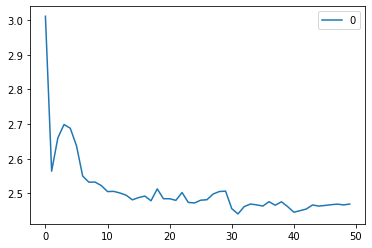

In [66]:
curve = pd.DataFrame(rmse_val2) #elbow curve 
curve.plot()

In [67]:

x_test = test_df.drop(to_be_dropped, axis=1)
y_test = test_df['NumRevolvingTradesWBalance']

classifier = neighbors.KNeighborsRegressor(n_neighbors = 31)

classifier.fit(x_train, y_train)

#test= test_df['MSinceOldestTradeOpen']
test_scaled = scaler.fit_transform(x_test)
test = pd.DataFrame(test_scaled)

#predicting on the test set and creating submission file
predict = classifier.predict(test)

print("\n---------------------------\n")
print("Predicted Values for Test Set :\n",predict)


---------------------------

Predicted Values for Test Set :
 [ 2.19354839  3.09677419  2.58064516  2.25806452  5.74193548  2.25806452
  3.16129032  2.48387097  2.96774194  4.19354839  2.29032258  2.35483871
  1.90322581  2.          1.87096774  5.58064516  3.51612903  1.58064516
  2.48387097  2.06451613  5.80645161  2.48387097  3.03225806  1.58064516
  3.64516129  2.03225806  3.70967742  1.5483871   2.77419355  2.41935484
  6.74193548  3.51612903  2.51612903  5.29032258  2.61290323  2.38709677
  2.61290323  7.19354839  2.5483871   6.77419355  4.41935484  2.58064516
  2.58064516  1.93548387  3.22580645  3.51612903  4.25806452  1.58064516
  3.83870968  3.70967742  3.16129032  4.67741935  8.67741935  3.74193548
  1.93548387  6.87096774  4.96774194  2.38709677  4.58064516  1.58064516
  3.90322581  2.74193548  4.32258065  4.          1.83870968  1.77419355
  2.4516129   1.41935484  3.96774194  1.74193548  2.90322581  7.64516129
  2.87096774  3.32258065  2.03225806  2.38709677  1.35483871 

In [69]:
rounded_values=np.round_(predict)
rounded_values

array([ 2.,  3.,  3.,  2.,  6.,  2.,  3.,  2.,  3.,  4.,  2.,  2.,  2.,
        2.,  2.,  6.,  4.,  2.,  2.,  2.,  6.,  2.,  3.,  2.,  4.,  2.,
        4.,  2.,  3.,  2.,  7.,  4.,  3.,  5.,  3.,  2.,  3.,  7.,  3.,
        7.,  4.,  3.,  3.,  2.,  3.,  4.,  4.,  2.,  4.,  4.,  3.,  5.,
        9.,  4.,  2.,  7.,  5.,  2.,  5.,  2.,  4.,  3.,  4.,  4.,  2.,
        2.,  2.,  1.,  4.,  2.,  3.,  8.,  3.,  3.,  2.,  2.,  1.,  4.,
        2.,  3.,  2.,  4.,  3.,  1.,  3.,  2.,  2.,  5.,  2.,  3.,  4.,
        2.,  5.,  2.,  3.,  6.,  2.,  2.,  2.,  3.,  2.,  9.,  4.,  2.,
        5.,  2.,  4.,  5.,  3.,  2.,  4.,  5.,  3.,  2.,  3.,  7.,  2.,
        3.,  5.,  7.,  5.,  2.,  5.,  4.,  2.,  7.,  7.,  5.,  2.,  2.,
        2.,  5.,  8.,  4.,  3.,  6.,  5.,  3., 12.,  2.,  2.,  3.,  4.,
        2.,  2.,  3.,  5.,  1.,  3.])

In [70]:
result=pd.DataFrame(rounded_values)

result.to_csv('D:/projects/XAI-finance2/result_NumRevolvingTradesWBalance.csv')

### NumInstallTradesWBalance

In [95]:
file = 'D:/projects/XAI-finance2/HELOC1-1.csv'
df = pd.read_csv(file)
df

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,SortingAssist
0,0,55,144,4,84,20,3,0,83,2,...,0,0,0,33,-8,8,1,1,69,1
1,0,61,58,15,41,2,4,4,100,200,...,0,0,0,0,-8,0,-8,0,0,2
2,0,67,66,5,24,9,0,0,100,200,...,0,4,4,53,66,4,2,1,86,3
3,0,66,169,1,73,28,1,1,93,76,...,0,5,4,72,83,6,4,3,91,4
4,0,81,333,27,132,12,0,0,100,200,...,0,1,1,51,89,3,1,0,80,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9856,1,73,131,5,57,21,0,0,95,80,...,7,0,0,26,-8,5,2,0,100,9857
9857,0,65,147,39,68,11,0,0,92,28,...,1,1,1,86,53,2,2,1,80,9858
9858,0,74,129,6,64,18,1,1,100,200,...,3,4,4,6,-8,5,-8,0,56,9859
9859,0,72,234,12,113,42,2,2,96,35,...,6,0,0,19,-8,4,1,0,38,9860


In [96]:
#applying KNN to NumInstallTradesWBalance

test_df = df[df['NumInstallTradesWBalance']==-8]

train_df = df[df['NumInstallTradesWBalance']!=-8]
test_df

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,SortingAssist
1,0,61,58,15,41,2,4,4,100,200,...,0,0,0,0,-8,0,-8,0,0,2
13,1,69,256,6,117,11,1,1,100,200,...,0,0,0,13,-8,2,-8,0,67,14
18,0,89,244,9,147,10,0,0,100,200,...,0,0,0,3,-8,2,-8,0,50,19
35,1,88,153,33,92,13,0,0,100,200,...,0,0,0,1,-8,1,-8,0,25,36
37,0,70,127,25,57,23,0,0,96,20,...,0,0,0,51,-8,9,-8,1,67,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9826,1,86,181,3,89,11,0,0,100,200,...,1,2,2,5,-8,2,-8,0,50,9827
9829,0,80,40,40,40,1,0,0,100,200,...,-8,0,0,27,-8,1,-8,1,100,9830
9840,1,79,120,2,43,13,0,0,100,200,...,4,2,1,15,-8,4,-8,0,44,9841
9849,1,93,417,25,235,9,0,0,100,200,...,-8,1,0,0,-8,1,-8,0,40,9850


In [97]:
#Split into test and train
from sklearn.model_selection import train_test_split
train , test = train_test_split(train_df, test_size = 0.3)

to_be_dropped =['NetFractionInstallBurden','NumInstallTradesWBalance','PercentTradesWBalance', 'SortingAssist']

x_train = train.drop(to_be_dropped, axis=1)
y_train = train['NumInstallTradesWBalance']

x_test = test.drop(to_be_dropped, axis=1)
y_test = test['NumInstallTradesWBalance']


In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [99]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
rmse_val2 = [] #to store rmse values for different k
for K in range(50):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val2.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.8099695138701852
RMSE value for k=  2 is: 1.7678846693768053
RMSE value for k=  3 is: 1.813746987703937
RMSE value for k=  4 is: 1.7650573087003918
RMSE value for k=  5 is: 1.71972517571419
RMSE value for k=  6 is: 1.7181109656882043
RMSE value for k=  7 is: 1.7127192779887277
RMSE value for k=  8 is: 1.7119630866531244
RMSE value for k=  9 is: 1.7041656433987233
RMSE value for k=  10 is: 1.7002535120326705
RMSE value for k=  11 is: 1.6865992683859041
RMSE value for k=  12 is: 1.6723912047850518
RMSE value for k=  13 is: 1.682206503358255
RMSE value for k=  14 is: 1.6769199961017622
RMSE value for k=  15 is: 1.67250180901154
RMSE value for k=  16 is: 1.673496918099093
RMSE value for k=  17 is: 1.671063383055436
RMSE value for k=  18 is: 1.6541520534425638
RMSE value for k=  19 is: 1.6488877853261739
RMSE value for k=  20 is: 1.635370236998544
RMSE value for k=  21 is: 1.6415795971584446
RMSE value for k=  22 is: 1.6428186528512885
RMSE value for k=  23 is: 1.

<AxesSubplot:>

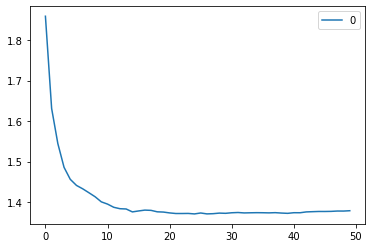

In [90]:
curve = pd.DataFrame(rmse_val2) #elbow curve 
curve.plot()

In [92]:

x_test = test_df.drop(to_be_dropped, axis=1)
y_test = test_df['NumInstallTradesWBalance']

classifier = neighbors.KNeighborsRegressor(n_neighbors = 25)

classifier.fit(x_train, y_train)

#test= test_df['MSinceOldestTradeOpen']
test_scaled = scaler.fit_transform(x_test)
test = pd.DataFrame(test_scaled)

#predicting on the test set and creating submission file
predict = classifier.predict(test)

print("\n---------------------------\n")
print("Predicted Values for Test Set :\n",predict)


---------------------------

Predicted Values for Test Set :
 [2.32 1.76 1.44 1.4  2.68 4.2  3.88 1.4  2.52 4.24 1.4  1.92 1.48 2.16
 2.44 3.68 1.2  2.08 1.28 2.92 1.48 2.44 1.8  2.12 1.8  1.96 1.68 2.16
 1.88 2.36 1.92 2.48 3.2  1.88 1.8  3.84 1.68 2.44 2.04 1.56 1.4  1.88
 3.84 2.96 2.28 1.44 2.48 1.36 1.68 1.88 2.4  1.64 2.36 1.68 1.68 3.48
 1.72 4.28 2.84 3.12 1.68 4.2  1.68 1.56 1.72 2.96 1.64 3.2  2.12 2.28
 1.52 2.92 2.52 6.08 1.64 3.12 1.4  1.56 2.68 2.76 3.16 1.08 2.32 1.56
 1.44 2.12 2.68 2.28 1.32 2.08 3.16 2.76 1.76 1.4  1.36 1.72 2.36 2.48
 2.84 2.2  2.16 2.72 1.76 2.88 1.88 1.36 1.8  3.32 2.12 1.64 1.4  1.64
 2.08 1.48 1.84 1.76 2.28 2.08 2.12 1.64 2.76 1.52 1.48 1.6  3.64 2.12
 1.56 1.68 2.6  1.4  2.08 2.44 1.48 2.6  1.64 1.16 2.36 2.28 1.36 2.44
 2.44 2.32 1.96 2.12 2.8  2.68 2.76 1.44 3.24 1.68 2.32 1.16 2.72 3.28
 2.64 1.36 1.84 1.8  2.68 1.8  1.92 1.92 1.36 2.36 1.6  1.72 1.36 2.84
 2.24 1.16 1.24 1.76 1.6  3.12 2.   3.28 1.56 2.76 3.   2.72 1.8  1.56
 2.04 3.6  2.7

In [93]:
rounded_values=np.round_(predict)
rounded_values

array([2., 2., 1., 1., 3., 4., 4., 1., 3., 4., 1., 2., 1., 2., 2., 4., 1.,
       2., 1., 3., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2.,
       2., 4., 2., 2., 2., 2., 1., 2., 4., 3., 2., 1., 2., 1., 2., 2., 2.,
       2., 2., 2., 2., 3., 2., 4., 3., 3., 2., 4., 2., 2., 2., 3., 2., 3.,
       2., 2., 2., 3., 3., 6., 2., 3., 1., 2., 3., 3., 3., 1., 2., 2., 1.,
       2., 3., 2., 1., 2., 3., 3., 2., 1., 1., 2., 2., 2., 3., 2., 2., 3.,
       2., 3., 2., 1., 2., 3., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2.,
       2., 3., 2., 1., 2., 4., 2., 2., 2., 3., 1., 2., 2., 1., 3., 2., 1.,
       2., 2., 1., 2., 2., 2., 2., 2., 3., 3., 3., 1., 3., 2., 2., 1., 3.,
       3., 3., 1., 2., 2., 3., 2., 2., 2., 1., 2., 2., 2., 1., 3., 2., 1.,
       1., 2., 2., 3., 2., 3., 2., 3., 3., 3., 2., 2., 2., 4., 3., 2., 1.,
       2., 2., 1., 2., 2., 3., 3., 2., 1., 2., 2., 2., 2., 3., 2., 2., 1.,
       2., 1., 2., 3., 2., 1., 2., 3., 2., 2., 2., 3., 3., 2., 1., 2., 1.,
       2., 1., 3., 1., 3.

In [101]:
result=pd.DataFrame(rounded_values)

result.to_csv('D:/projects/XAI-finance2/result_NumInstallTradesWBalance.csv')

### NetFractionInstallBurden

In [142]:
file = 'D:/projects/XAI-finance2/HELOC1-1.csv'
df = pd.read_csv(file)
df

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,SortingAssist
0,0,55,144,4,84,20,3,0,83,2,...,0,0,0,33,-8,8,1,1,69,1
1,0,61,58,15,41,2,4,4,100,200,...,0,0,0,0,-8,0,2,0,0,2
2,0,67,66,5,24,9,0,0,100,200,...,0,4,4,53,66,4,2,1,86,3
3,0,66,169,1,73,28,1,1,93,76,...,0,5,4,72,83,6,4,3,91,4
4,0,81,333,27,132,12,0,0,100,200,...,0,1,1,51,89,3,1,0,80,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9856,1,73,131,5,57,21,0,0,95,80,...,7,0,0,26,-8,5,2,0,100,9857
9857,0,65,147,39,68,11,0,0,92,28,...,1,1,1,86,53,2,2,1,80,9858
9858,0,74,129,6,64,18,1,1,100,200,...,3,4,4,6,-8,5,3,0,56,9859
9859,0,72,234,12,113,42,2,2,96,35,...,6,0,0,19,-8,4,1,0,38,9860


In [143]:
#applying KNN to NetFractionInstallBurden

test_df = df[df['NetFractionInstallBurden']==-8]

train_df = df[df['NetFractionInstallBurden']!=-8]
test_df

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,SortingAssist
0,0,55,144,4,84,20,3,0,83,2,...,0,0,0,33,-8,8,1,1,69,1
1,0,61,58,15,41,2,4,4,100,200,...,0,0,0,0,-8,0,2,0,0,2
8,0,59,324,2,138,24,0,0,85,5,...,0,1,1,68,-8,7,1,3,90,9
13,1,69,256,6,117,11,1,1,100,200,...,0,0,0,13,-8,2,2,0,67,14
14,0,63,262,26,95,3,2,2,75,27,...,0,0,0,37,-8,2,1,0,100,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9855,0,75,410,2,121,37,1,1,83,10,...,1,1,1,34,-8,7,1,1,53,9856
9856,1,73,131,5,57,21,0,0,95,80,...,7,0,0,26,-8,5,2,0,100,9857
9858,0,74,129,6,64,18,1,1,100,200,...,3,4,4,6,-8,5,3,0,56,9859
9859,0,72,234,12,113,42,2,2,96,35,...,6,0,0,19,-8,4,1,0,38,9860


In [159]:
#Split into test and train
from sklearn.model_selection import train_test_split
train , test = train_test_split(train_df, test_size = 0.2)

to_be_dropped =['NetFractionInstallBurden', 'SortingAssist', 'ExternalRiskEstimate','MSinceOldestTradeOpen','MSinceMostRecentTradeOpen','AverageMInFile','NumSatisfactoryTrades', 'NumTrades60Ever2DerogPubRec','NumTrades90Ever2DerogPubRec','PercentTradesNeverDelq','MSinceMostRecentDelq', 'MSinceMostRecentInqexcl7days','NumInqLast6M','NumInqLast6Mexcl7days','MaxDelq2PublicRecLast12M', 'MaxDelqEver']

x_train = train.drop(to_be_dropped, axis=1)
y_train = train['NetFractionInstallBurden']

x_test = test.drop(to_be_dropped, axis=1)
y_test = test['NetFractionInstallBurden']


In [160]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [161]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [162]:
rmse_val2 = [] #to store rmse values for different k
for K in range(50):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val2.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 37.783204504589854
RMSE value for k=  2 is: 29.959704850493473
RMSE value for k=  3 is: 27.93092716875793
RMSE value for k=  4 is: 26.635927353275918
RMSE value for k=  5 is: 25.968410744386098
RMSE value for k=  6 is: 25.625771138162754
RMSE value for k=  7 is: 25.343607979778348
RMSE value for k=  8 is: 24.95532029735164
RMSE value for k=  9 is: 24.876757379306323
RMSE value for k=  10 is: 24.662537733207028
RMSE value for k=  11 is: 24.50851525767767
RMSE value for k=  12 is: 24.39744284725198
RMSE value for k=  13 is: 24.285563359318314
RMSE value for k=  14 is: 24.223585682273356
RMSE value for k=  15 is: 24.15592372820362
RMSE value for k=  16 is: 24.082243800124676
RMSE value for k=  17 is: 24.104024491231936
RMSE value for k=  18 is: 24.035534413390444
RMSE value for k=  19 is: 24.007746080090023
RMSE value for k=  20 is: 23.940200573269475
RMSE value for k=  21 is: 23.88371283951701
RMSE value for k=  22 is: 23.860523539385706
RMSE value for k=  23 is:

<AxesSubplot:>

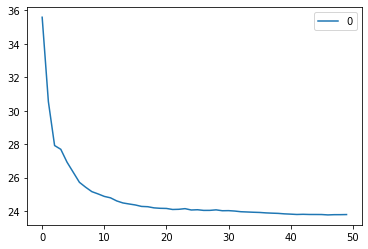

In [149]:
curve = pd.DataFrame(rmse_val2) #elbow curve 
curve.plot()

In [168]:

x_test = test_df.drop(to_be_dropped, axis=1)
y_test = test_df['NetFractionInstallBurden']

classifier = neighbors.KNeighborsRegressor(n_neighbors = 51)

classifier.fit(x_train, y_train)

#test= test_df['MSinceOldestTradeOpen']
test_scaled = scaler.fit_transform(x_test)
test = pd.DataFrame(test_scaled)

#predicting on the test set and creating submission file
predict = classifier.predict(test)

print("\n---------------------------\n")
print("Predicted Values for Test Set :\n",predict)


---------------------------

Predicted Values for Test Set :
 [76.05882353 70.37254902 58.74509804 ... 66.92156863 64.66666667
 77.29411765]


In [166]:
rounded_values=np.round_(predict)
rounded_values

array([76., 71., 59., ..., 67., 65., 78.])

In [169]:
result=pd.DataFrame(rounded_values)

result.to_csv('D:/projects/XAI-finance2/result_NetFractionInstallBurden.csv')